<div style="justify-content: center; align-items: center; background-color:#234457; padding: 10px; border-radius: 25px;">
    <h1 style="font-family: 'OCR A Extended', sans-serif; font-size: 30px; color: White;  margin-top: 9px; margin-bottom: 9px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); letter-spacing: 2px;">
        <center>
            Heart Attack❤️‍🩹 | EDA + ANN 📈
        </center>
    </h1>
</div>

# Heart Attack Analysis & Prediction using ANN

![Heart Attack](https://myacare.com/uploads/AdminBlogs/91d19c6155d145348eb5dcd8b161fd36.png)

----------------------------
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden; letter-spacing: 3px; text-align: center; font-weight:300;  ">Introduction 📖</p>

<div style="border: 2px solid #234457; border-radius: 10px; padding: 10px;">
    <span style="font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
    "Heart attacks" are a serious health issue worldwide. This analysis aims to find out which factors are connected to heart attacks and which ones affect it the most. By using data analysis and machine learning, <strong>the goal</strong> is to build a machine-learning model that can accurately predict the likelihood of someone having a heart attack. This can help people know if they are at risk and take steps to stay healthy and avoid heart attacks.
     </span>
</div>

----------------------------
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden; letter-spacing: 3px; text-align: center; font-weight:300;  ">Table of Contents 📑</p>

> - [**1 - Import Libraries 📚**](#1)
> - [**2 - Data Exploration 🔎**](#2)
> - [**3 - Exploratory Data Analysis 📊**](#3)
>    - [**3.1- Univariate Analysis**](#3.1)
>    - [**3.2- Bivariate Analysis**](#3.2)
>    - [**3.3- Multivariate Analysis**](#3.2)
> - [**4 - Data Preprocessing ⚒️**](#4)
>    - [**4.1- Handling Missing Data**](#4.1)
>    - [**4.2- Handling Categorical Data**](#4.2)
>    - [**4.3- Handling Outliers**](#4.3)
>    - [**4.4- Check The Distribution of Classes**](#4.4)
>    - [**4.5- Data Split to Train and Test Sets**](#4.5)
>    - [**4.6- Feature Scaling**](#4.6)
> - [**5- ANN Model Training with Cross-Validation and Evaluation ⚙️**](#5)
> - [**5.1- Build ANN Model Training with Cross-Validation**](#5.1)
>    - [**5.2- ANN Model Evaluation**](#5.2)

----------------------------
<a class="anchor"  id="1"></a>
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden; letter-spacing: 3px; text-align: center; font-weight:300; ">1 | Import Libraries 📚</p>

In [1]:
# Install libraries
!pip install datasist
!pip install category_encoders

In [2]:
# EDA Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.subplots as sp
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Data Preprocessing Libraries
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Machine Learing and Deep Learning Libraries
import tensorflow as tf
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_regression, RFE, SelectFromModel
from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score
from tensorflow.keras.utils import plot_model

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

----------------------------
<a class="anchor"  id="2"></a>
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden; letter-spacing: 3px; text-align: center; font-weight:300; ">2 | Data Exploration 🔎</p>

In [3]:
df = pd.read_csv(r"Dataset\heart.csv")
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        Feature Exploration
</h2>

<div style="border: 2px solid black; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<ul>
    <li><strong><code>Age</code></strong>: The patient's age. (Continuous)</li>
    <li><strong><code>Sex</code></strong>: The patient's gender (0 for female, 1 for male). (Categorical)</li>
    <li><strong><code>Chest Pain Type (cp)</code></strong>: (Categorical)
        <ul>
            <li><strong>Value 0</strong>: Typical Angina</li>
            <li><strong>Value 1</strong>: Atypical Angina</li>
            <li><strong>Value 2</strong>: Non-Anginal Pain</li>
            <li><strong>Value 3</strong>: Asymptomatic</li>
        </ul>
    </li>
    <li><strong><code>Resting Blood Pressure (trtbps)</code></strong>: (Continuous)</li>
    <li><strong><code>Serum Cholesterol Levels (chol)</code></strong>: (Continuous)</li>
    <li><strong><code>Fasting Blood Sugar (fbs)</code></strong>: (Categorical)
        <ul>
            <li><strong>Value 0</strong>: <= 120 mg/dL</li>
            <li><strong>Value 1</strong>: > 120 mg/dL</li>
        </ul>
    </li>
    <li><strong><code>Resting ECG Results (restecg)</code></strong>: (Categorical)
        <ul>
            <li><strong>Value 0</strong>: Normal</li>
            <li><strong>Value 1</strong>: ST-T Wave Abnormality</li>
            <li><strong>Value 2</strong>: Probable or Definite Left Ventricular Hypertrophy</li>
        </ul>
    </li>
    <li><strong><code>Maximum Heart Rate During Exercise (thalachh)</code></strong>: (Continuous)</li>
    <li><strong><code>Exercise-Induced Angina (exng)</code></strong>: (Categorical)
        <ul>
            <li><strong>Value 0</strong>: No</li>
            <li><strong>Value 1</strong>: Yes</li>
        </ul>
    </li>
    <li><strong><code>ST-Segment Depression (oldpeak)</code></strong>: (Continuous)</li>
    <li><strong><code>Slope of ST Segment (slp)</code></strong>: (Categorical)
        <ul>
            <li><strong>Value 0</strong>: Downsloping</li>
            <li><strong>Value 1</strong>: Flat</li>
            <li><strong>Value 2</strong>: Upsloping diagnosis</li>
        </ul>
    </li>
    <li><strong><code>Number of Major Vessels Colored by Fluoroscopy (caa)</code></strong>: (Categorical)</li>
    <li><strong><code>Thalassemia Type (thall)</code></strong>: (Categorical)
        <ul>
            <li><strong>Value 0</strong>: None (Normal)</li>
            <li><strong>Value 1</strong>: Fixed Defect</li>
            <li><strong>Value 2</strong>: Reversible Defect</li>
            <li><strong>Value 3</strong>: Thalassemia</li>
        </ul>
    </li>
    <li><strong><code>Risk of Heart Attack (output)</code></strong>: (Categorical)
        <ul>
            <li><strong>Value 0</strong>: No</li>
            <li><strong>Value 1</strong>: Yes</li>
        </ul>
    </li>
</ul>

</div>

In [4]:
# check the dataset shape
print("Number of Columns in data",df.shape[1])
print("---------------------------------------")
print("Number of Rows in data",df.shape[0])

Number of Columns in data 14
---------------------------------------
Number of Rows in data 303


In [5]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# checking for duplicated values
df.duplicated().sum()

1

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
    <ul>
        <li>Data contain 1 duplicated value.
</li>
    </ul>
</div>

In [7]:
# Removing duplicated data
df.drop_duplicates(inplace=True)

In [8]:
# checking if duplicated value has been removed
df.duplicated().sum()

0

In [9]:
# checking count the number of unique values in each column of the data
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [10]:
# Descriptive analysis for numerical data
df.describe().style.background_gradient()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.420530,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.047970,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


----------------------------
<a class="anchor"  id="3"></a>
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden; letter-spacing: 3px; text-align: center; font-weight:300; ">3 | Exploratory Data Analysis 📊</p>

<a class="anchor"  id="3.1"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        3.1- Univariate Analysis 
</h2>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        Exploration: Categorical Features
</h3>

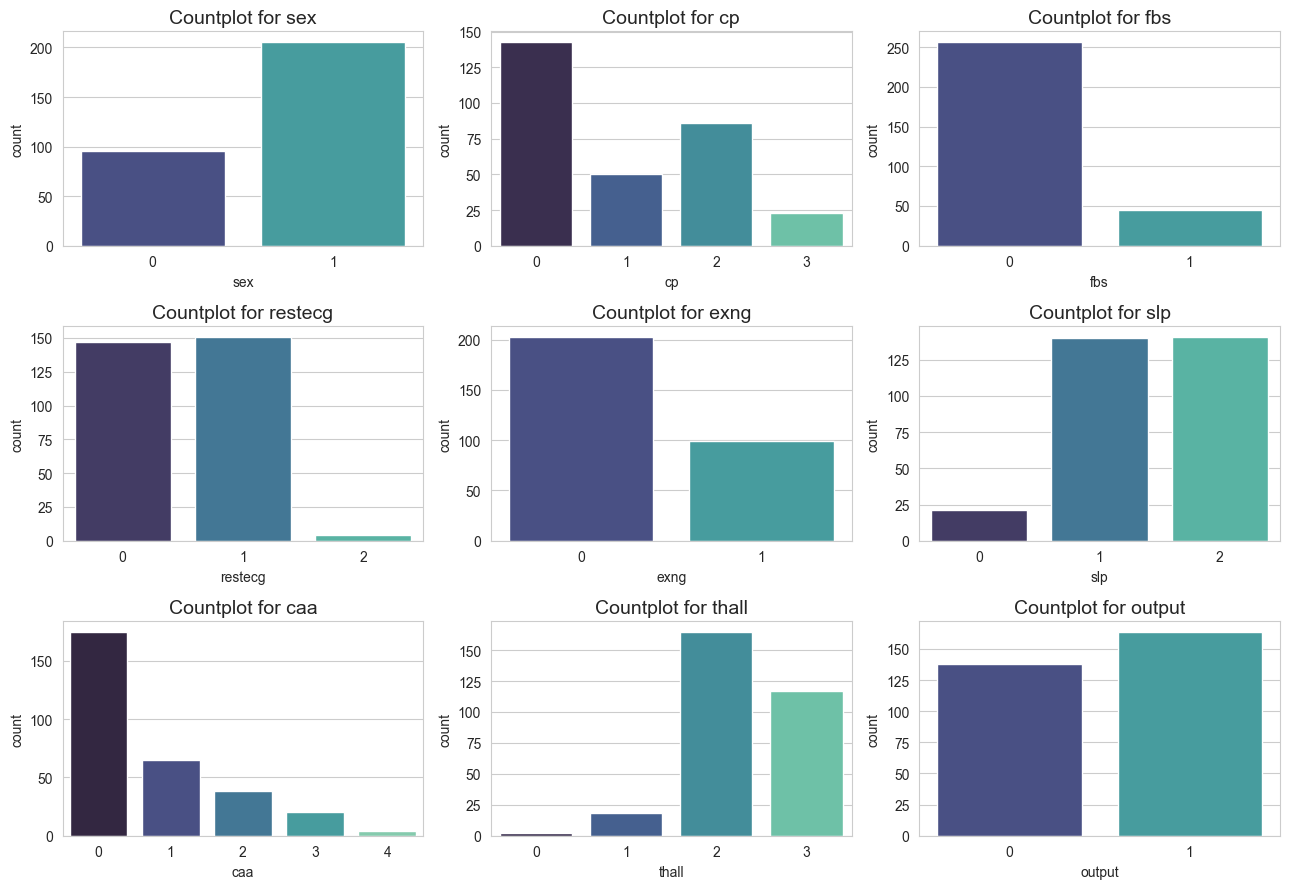

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(13, 9))

# Creating a list of categorical features 
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

#Looping through the subplots and create countplots for each feature
for i, ax in enumerate(axes.flat):
    if i < len(cat_features):
        sns.countplot(data=df, x=cat_features[i], ax=ax, palette="mako", orient='h')
        ax.set_title(f'Countplot for {cat_features[i]}', fontsize=14)
        
# Adjusting the layout for better visualization
plt.tight_layout()

plt.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>Most of the categorical features are imbalanced.</li>
</ul>
    
</div>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        Exploration: Numerical Features
</h3>

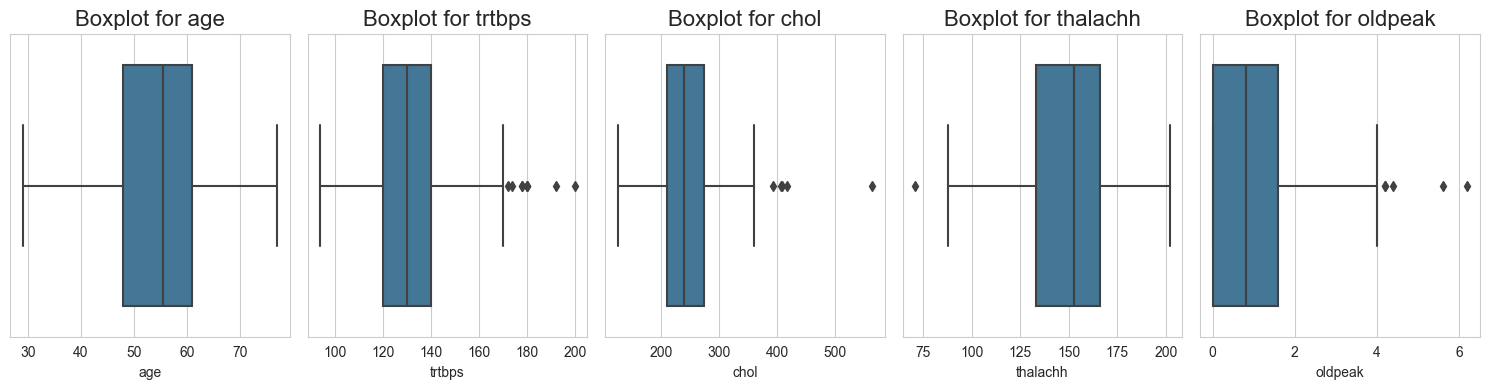

In [12]:
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

# Creating a list of categorical features 
cont_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

#Looping through the subplots and create countplots for each feature
for i, ax in enumerate(axes.flat):
    if i < len(cont_features):
        sns.boxplot(data=df, x=cont_features[i], ax=ax, palette="mako", orient='h')
        ax.set_title(f'Boxplot for {cont_features[i]}', fontsize=16)
        
# Adjusting the layout for better visualization
plt.tight_layout()

plt.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>Minor Outliers were detected in the continuous features but these outliers match the dataset's overall trends and aren't data errors..</li>
</ul>
    
</div>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        Skewed Continuous Features Exploration
</h3>

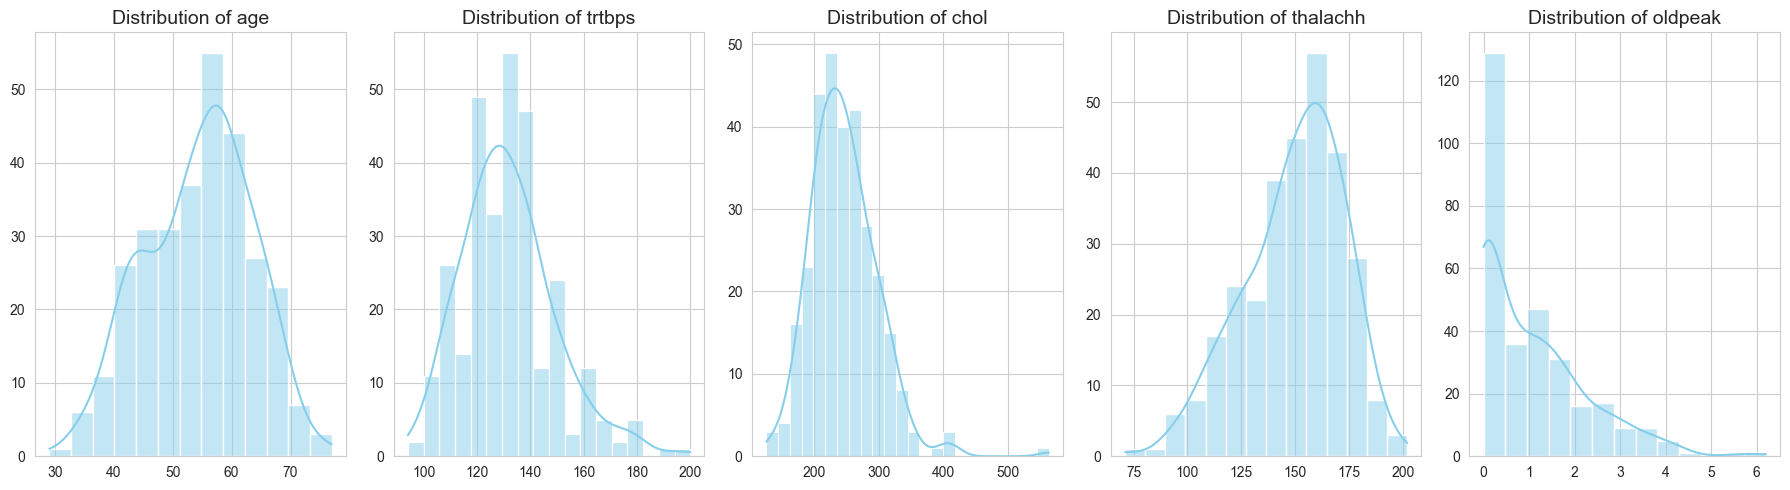

In [13]:
cont_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
fig, axes = plt.subplots(ncols=len(cont_columns), figsize=(18, 5))

# Plot distribution plots for each skewed column
for i, column in enumerate(cont_columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>Some continuous features have slight skewness due to outliers.</li>
</ul>
    
</div>

<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        Conclusion of Univariate Analysis
</h2>

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
    
<ul>
    <li>
Categorical features show imbalances.</li>
    <li>
Minor outliers exist in continuous features but align with dataset patterns.</li>
    <li>
Slight skewness in some continuous features, mainly due to outliers.
</li>


</ul>
    
</div>

---------------------------------------------
<a class="anchor"  id="3.2"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        3.2- Bivariate Analysis 
</h2>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px; ">
        The Effect of Age on Risk of Heart Attack (Output)
</h3>

In [14]:
# Creating a histogram using Plotly Express to visualize the relationship between age and the risk of heart attack
fig = px.histogram(df, x='age', color='output', title='The Effect of Age on Risk of Heart Attack (Output)',
                   labels={'age': 'Age', 'output': 'Output'}, 
                   marginal='box', barmode='group',
                   color_discrete_sequence=['#48a890', '#234457'], text_auto=True  
                   )

# Customizing the layout of the histogram
fig.update_layout(
    xaxis=dict(tickmode='linear', dtick=2),  # Adjusting x-axis tick settings
    bargap=0.1  # Setting the gap between bars
)

# Customizing gridlines on the plot
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

# Customizing the background colors
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

fig.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>The graph shows that age alone doesn't determine the risk of a heart attack. It shows that heart attack risk varies across different age groups.
</li>
</ul>
    
</div>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px; ">
        The Effect of Sex on Risk of Heart Attack (Output)
</h3>

In [15]:
# Filtering the DataFrame to separate male and female data
df_male = df[df['sex'] == 1]
df_female = df[df['sex'] == 0]

# Counting the occurrences of heart attack presence (output) for males and females
male_counts = df_male['output'].value_counts()
female_counts = df_female['output'].value_counts()

colors = ['#234457', '#48a890']  

# Creating subplots for male and female distributions
fig = make_subplots(rows=1, cols=2, subplot_titles=('Male', 'Female'), specs=[[{'type':'domain'}, {'type':'domain'}]])

# Adding a pie chart for male heart attack presence
fig.add_trace(go.Pie(values=male_counts, name='Male',
                     marker=dict(colors=colors)), 1, 1)

# Adding a pie chart for female heart attack presence
fig.add_trace(go.Pie(values=female_counts, name='Female',
                     marker=dict(colors=colors)), 1, 2)

# Customizing the hole in the pie charts
fig.update_traces(hole=.4)

# Customizing the overall layout, title, and annotations
fig.update_layout(title_text='The Effect of Sex on Risk of Heart Attack (Output)', title_font=dict(size=18), title_x=0.5, title_y=0.95,
                 annotations=[dict(text='Male', x=0.22, y=0.45, font_size=25, showarrow=False),
                 dict(text='Female', x=0.78, y=0.45, font_size=25, showarrow=False)])

# Customizing background colors
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

fig.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li> The pie chart shows that more males (44.7%) tend to have heart attacks compared to females (25%).
</li>
</ul>
    
</div>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  ">
        The Effect of Cp (Chest Pain Types) on Risk of Heart Attack (Output)
</h3>

In [16]:
# Creating a histogram to visualize the distribution of chest pain types (cp) with respect to heart attack risk (output)
fig = px.histogram(df, x='cp', color='output', title='The Effect of Cp (Chest Pain Types) on Risk of Heart Attack (Output)',
                   labels={'cp': 'Chest Pain Types', 'output': 'Output'}, barmode='group',
                   color_discrete_sequence=['#48a890', '#234457'], text_auto=True 
                   )

# Customizing the gap between bars in the histogram
fig.update_layout(
    bargap=0.1
)

# Customizing the x-axis to show tick values and labels for different chest pain types
fig.update_xaxes(showgrid=True, gridcolor='lightgray', tickvals=[0, 1, 2, 3],
                 ticktext=['Typical Angina (0)', 'Atypical Angina (1)', 'Non-Anginal Pain (2)', 'Asymptomatic (3)'])

# Customizing the appearance of the y-axis
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

# Customizing background colors
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

fig.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li> People with chest pain type 2 (Non-Anginal pain) are more prone to heart attacks.
</li>
</ul>
    
</div>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  ">
        The Effect of  Resting ECG Results (restecg) on Risk of Heart Attack (Output)
</h3>

In [17]:
# Creating a histogram to visualize the effect of Resting ECG Results (restecg) on Heart Attack Risk (output)
fig = px.histogram(df, x='restecg', color='output', 
                   title='The Effect of Resting ECG Results (restecg) on Risk of Heart Attack (Output)',
                   labels={'restecg': 'Resting ECG Results (restecg)', 'output': 'Output'}, barmode='group',
                   color_discrete_sequence=['#48a890', '#234457'],
                   category_orders={'restecg': ['0', '1', '2']},  text_auto=True 
                   )

# Customizing the x-axis tick values and labels
fig.update_xaxes(tickvals=[0, 1, 2], ticktext=['Normal (0)', 'ST-T Wave Abnormality (1)', 'Probable/Definite LVH (2)'])

# Customizing the background color and gridlines
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

fig.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li> People with restecg type 1 (ST-T Wave Abnormality) are more prone to heart attacks.
</li>
</ul>
    
</div>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  ">
        The Effect of Exercise-Induced Angina (exng) on Risk of Heart Attack (Output)
</h3>

In [18]:
# Creating a histogram to visualize the relationship between Exercise-Induced Angina (exng) and the risk of heart attack (Output)
fig = px.histogram(df, x='exng', color='output', title='Exercise-Induced Angina (exng) vs. Risk of Heart Attack (Output)',
                   labels={'exng': 'Exercise-Induced Angina (exng)', 'output': 'Output'}, 
                   barmode='group',
                   color_discrete_sequence=['#48a890', '#234457'], text_auto=True  
                   )

# Customizing layout: adjusting the gap between bars, marker appearance, gridlines, and title
fig.update_layout(
    bargap=0.1
)
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

fig.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>People who have Exercise-Induced Angina (exng) are more prone to heart attacks.
</li>
</ul>
    
</div>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;">
        The Effect of Oldpeak on Risk of Heart Attack (Output)
</h3>

In [19]:
# Creating a histogram to visualize the relationship between Oldpeak and the risk of heart attack (Output)
fig = px.histogram(df, x='oldpeak', color='output', title='The Effect of Oldpeak on Risk of Heart Attack (Output)',
                   labels={'oldpeak': 'Oldpeak', 'output': 'Output'}, barmode='group',
                   color_discrete_sequence=['#48a890', '#234457'], text_auto=True )

# Customizing layout: adjusting the gap between bars, marker appearance, gridlines, and title
fig.update_layout(
    bargap=0.1
)
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

fig.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>People with an Oldpeack value of 0 are more prone to heart attacks.
</li>
</ul>
    
</div>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;">
        The Effect of Slope of ST Segment (slp) on Risk of Heart Attack (Output)
</h3>

In [20]:
# Creating a histogram to visualize the relationship between the Slope of ST Segment (slp) and the risk of heart attack (Output)
fig = px.histogram(df, x='slp', color='output', title='The Effect of Slope of ST Segment (slp) on Risk of Heart Attack (Output)',
                   labels={'slp': 'Slope of ST Segment', 'output': 'Output'}, barmode='group',
                   color_discrete_sequence=['#48a890', '#234457'], text_auto=True )

# Customizing layout: adjusting the gap between bars, marker appearance, gridlines, and title
fig.update_layout(
    bargap=0.1
)
fig.update_xaxes(showgrid=True, gridcolor='lightgray', tickvals=[0, 1, 2, 3],
                 ticktext=['Downsloping (0)', 'Flat (1)', 'Upsloping (2)'])
fig.update_yaxes(showgrid=True, gridcolor='lightgray')
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

fig.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>People with slp type 2 (Upsloping) are more prone to heart attacks.
</li>
</ul>
    
</div>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;">
        The Effect of Number of Major Vessels Colored by Fluoroscopy (CAA) on Risk of Heart Attack (Output)
</h3>

In [21]:
# Creating a histogram to visualize the relationship between the Number of Major Vessels (caa) and the risk of heart attack (Output)
fig = px.histogram(df, x='caa', color='output', barmode='group', 
                   title='The Effect of Number of Major Vessels Colored by Fluoroscopy (CAA) on Risk of Heart Attack (Output)', 
                   color_discrete_sequence=['#48a890', '#234457'],
                   labels={'caa': 'CAA (Number of Major Vessels)', 'output': 'Output'}, text_auto=True )

# Customizing layout: adjusting the title, font size, and background color
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')
fig.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>People with CAA value of 0 are more prone to heart attacks.
</li>
</ul>
    
</div>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;">
        The Effect of Thalassemia Type (Thall) and Risk of Heart Attack (Output)
</h3>

In [22]:
# Creating a histogram to visualize the relationship between Thalassemia Type (Thall) and the risk of heart attack (Output)
fig = px.histogram(df, x='thall', color='output', title='The Effect of Thalassemia Type (Thall) and Risk of Heart Attack (Output)',
                   labels={'thall': 'Thalassemia Type', 'output': 'Output'}, barmode='group',
                   color_discrete_sequence=['#48a890', '#234457'], text_auto=True )

# Customizing layout: adjusting the gap between bars, marker appearance, gridlines, and title
fig.update_layout(
    bargap=0.1
)
fig.update_xaxes(showgrid=True, gridcolor='lightgray', tickvals=[0, 1, 2, 3], 
                 ticktext=['None (Normal) (0)', 'Fixed Defect (1)', 'Reversible Defect (2)', 'Thalassemia (3)'])
fig.update_yaxes(showgrid=True, gridcolor='lightgray')
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')
fig.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>People with Thall type 2 (Reversible Defect) are more prone to heart attacks.
</li>
</ul>
    
</div>

<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        Conclusion of Bivariate Analysis
</h2>

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
    
<ul>
    <li>
Heart attack risk changes with age, but age alone isn't the only factor.</li>
    <li>
More males (44.7%) tend to have heart attacks than females (25%).</li>
    <li>
Chest pain type 2 (Non-Anginal pain) raises heart attack risk.
</li>
        <li>
Restecg type 1 (ST-T Wave Abnormality) means a higher risk of heart attacks.
</li>
        <li>
People that have Exercise-Induced Angina (exng), their heart attack risk is higher.
</li>
        <li>
An Oldpeak value of 0 means a higher risk of heart attacks.
</li>
        <li>
People that are in slp type 2 (Upsloping), Their heart attack risk increases.
</li>
        <li>
A CAA value of 0 links to a higher risk of heart attacks.
</li>
        <li>
Thall type 2 (Reversible Defect) increases the risk of heart attacks.
</li>
</ul>
    
</div>

---------------------------------------------
<a class="anchor"  id="3.3"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        3.3- Multivariate Analysis 
</h2>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;">
        The Effect of Resting Blood Pressure (trtbps) and Age on Heart Attack Risk 
</h3>

In [23]:
# Creating a scatter plot
fig = px.scatter(df, x='age', y='trtbps', color=df['output'].astype(str),
                 title='The Effect of Resting Blood Pressure (trtbps) and Age on Heart Attack Risk ',
                 labels={'age': 'Age', 'trtbps': 'Resting Blood Pressure'},
                 color_discrete_sequence=['#48a890', '#234457'])  

# Customizing the background color and gridlines
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')
fig.update_layout(legend_title_text='Output') # Rename the legend

fig.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>The scatter plot shows a positive correlation between age and resting blood pressure, with older people having higher resting blood pressure, potentially increasing their risk of heart attacks.
</li>
</ul>
    
</div>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;">
The Effect of Serum Cholesterol Levels (chol) and Age on Heart Attack Risk
</h3>

In [24]:
# Creating a scatter plot
fig = px.scatter(df, x='age', y='chol', color=df['output'].astype(str),
                 title='The Effect of Serum Cholesterol Levels (chol) and Age on Heart Attack Risk',
                 labels={'age': 'Age', 'chol': 'Serum Cholesterol Levels'},  
                 color_discrete_sequence=['#48a890', '#234457']) 

# Customizing the background color and gridlines
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')
fig.update_layout(legend_title_text='Output') 

fig.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li> The scatter plot shows a positive correlation between age and serum cholesterol levels, with older people often having higher cholesterol levels, potentially increasing their risk of heart attacks.
</li>
</ul>
    
</div>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;">
Maximum Heart Rate During Exercise (thalachh) and Age on Heart Attack Risk</h3>

In [25]:
# Creating a scatter plot
fig = px.scatter(df, x='age', y='thalachh', color=df['output'].astype(str),
                 title='The Effect of Maximum Heart Rate During Exercise (thalachh) and Age on Heart Attack Risk',
                 labels={'age': 'Age', 'thalachh': 'Maximum Heart Rate During Exercise'},  
                 color_discrete_sequence=['#48a890', '#234457']) 

# Customizing the background color and gridlines
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')
fig.update_layout(legend_title_text='Output')

fig.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li> The scatter plot shows a negative correlation between age and Maximum Heart Rate During Exercise , with older individuals often having low Maximum Heart Rate During Exercise ,This could potentially increase their risk of heart attacks.
</li>
</ul>
    
</div>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        Conclusion of Multivariate Analysis
</h3>

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
    
<ul>
    <li>
As people get older, their blood pressure tends to go up, increasing their chances of a heart attack.</li>
    <li>
Older people often have higher cholesterol levels, which can also raise their risk of heart attacks.</li>
    <li>
The older people get, the lower their maximum heart rate during exercise, and this might make them more vulnerable to heart attacks.
</li>
        <li>
It's crucial for older people to manage their heart health effectively to reduce the risk of heart attacks.
</li>
</ul>
    
</div>

----------------------------
<a class="anchor"  id="4"></a>
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden; letter-spacing: 3px; text-align: center; font-weight:300; ">4 | Data Preprocessing ⚒️</p>

<a class="anchor"  id="4.1"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        4.1- Handling Missing Data 
</h2>

In [26]:
# checking for missing values in data
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
    <ul>
    <li> Data does not contain any missing values
</li>
</ul>
    
</div>

<a class="anchor"  id="4.2"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        4.2- Handling Categorical Data
</h2>

<div style="border: 2px solid black; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
    <ul>
        <li><strong><code>Nominal</code></strong> Categories without a meaningful order or ranking like <strong>(sex ,cp, fbs, restecg, exng, slp, caa, thall)</strong>.</li>
        <li><strong><code>Ordinal</code></strong>Categories with a meaningful order or ranking like <strong>(output)</strong>.</li>
    </ul>
</div>

In [27]:
# Working with Nominal Features with pandas `get_dummies` function.
df = pd.get_dummies(df, columns=['cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])

encoded = list(df.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

30 total features after one-hot encoding.


In [28]:
df.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,1,145,233,150,2.3,1,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,False,True,False,...,True,True,False,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,False,True,False,...,True,True,False,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,True,False,False,...,True,True,False,False,False,False,False,False,True,False


<a class="anchor"  id="4.3"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        4.3- Handling Outliers
</h2>

In [29]:
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Detect outliers in numerical features
outliers_indices = detect_outliers(df, features=numerical_features, n=0)
number_of_outliers = len(outliers_indices)

print(f'Number of outliers in the Data: {number_of_outliers}')

Number of outliers in the Data: 19


<div style="border: 2px solid black; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<ul>
  Identified outliers in the data, but since they align with the pattern, I'll keep them
</ul>
  
</div>

<a class="anchor"  id="4.4"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        4.4- Check The Distribution of Classes
</h2>

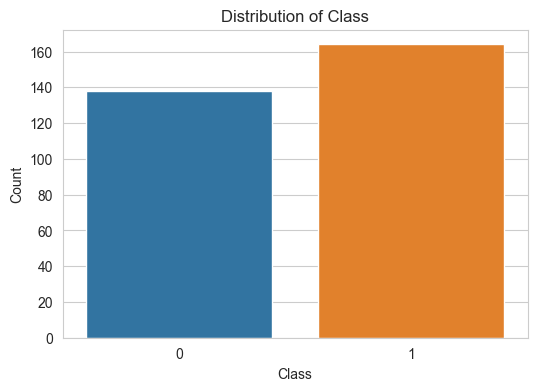

In [30]:
# Assuming your DataFrame is named "df"
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.countplot(x='output', data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class')
plt.show()

In [31]:
# Check the distribution of classes
print("Class distribution in dataset:")
print(df['output'].value_counts())

Class distribution in dataset:
output
1    164
0    138
Name: count, dtype: int64


<a class="anchor"  id="4.5"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        4.5- Data Split to Train and Test Sets
</h2>

In [32]:
# First we extract the x Featues and y Label
X = df.drop(['output'], axis=1)
y = df['output']

In [33]:
X.shape, y.shape

((302, 29), (302,))

In [34]:
# Then we Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                   )

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 241 samples.
Testing set has 61 samples.


<a class="anchor"  id="4.6"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        4.6- Feature Scaling
</h2>

<h3 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">   
   Robust Scaling Continuous Features with RobustScaler
</h3>

In [35]:
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Creating a RobustScaler instance
scaler = RobustScaler()

# Transforming (scaling) the continuous features in the training and testing data
X_train_cont_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_cont_scaled = scaler.transform(X_test[numerical_features])

# Replacing the scaled continuous features in the original data
X_train[numerical_features] = X_train_cont_scaled
X_test[numerical_features] = X_test_cont_scaled

# Display the modified X_train with scaled features
display(X_train)

,age,sex,trtbps,chol,thalachh,oldpeak,cp_0,cp_1,cp_2,cp_3,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
132,-1.076923,1,-0.50,0.887097,0.344828,-0.5000,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False
203,0.923077,1,2.50,0.548387,-0.068966,0.5000,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
197,0.846154,1,-0.25,0.225806,0.379310,-0.3750,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
75,-0.076923,0,0.25,0.161290,0.310345,0.3750,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
177,0.615385,1,0.50,1.532258,0.206897,-0.5000,False,False,True,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1.153846,1,-1.00,-1.096774,0.206897,-0.5000,True,False,False,False,...,True,True,False,False,False,False,False,False,False,True
71,-0.384615,1,-1.80,-0.209677,0.068966,-0.5000,False,False,True,False,...,True,False,True,False,False,False,False,False,False,True
106,1.000000,1,1.50,-0.096774,-0.724138,-0.4375,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
271,0.384615,1,0.20,-0.096774,-0.241379,1.1250,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


----------------------------
<a class="anchor"  id="5"></a>
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden; letter-spacing: 3px; text-align: center; font-weight:300; ">5 | ANN Model Training with Cross-Validation and Evaluation ⚙️</p>

<a class="anchor"  id="5.1"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        5.1- Build ANN Model Training with Cross-Validation
</h2>

## Implementation of 5-Fold Cross-Validation for ANN

This implementation details the addition of k-fold cross-validation to a previously existing Artificial Neural Network (ANN) designed for binary classification. The network is trained using TensorFlow/Keras, and the data is partitioned into 5 separate folds to ensure that the model's performance is evaluated robustly across different subsets of the dataset.

### Key Features of the Implementation
- **Random Seed Setting**: Consistency and reproducibility are ensured by setting the random seed at the beginning of the script.
- **KFold Cross-Validation**: The data is split into 5 different sets using the `KFold` class from scikit-learn, with shuffling enabled to randomize the data partitions.
- **Model Re-Initialization**: To prevent information leakage across folds and ensure that each fold starts training from scratch, the neural network model is re-instantiated for each fold.
- **Early Stopping**: An early stopping mechanism is employed to halt training if the validation loss does not improve for a consecutive number of epochs, thus preventing overfitting.
- **Verbose Output Control**: The verbosity of the training process is set to zero to minimize output clutter during model training across each fold.

### Model Architecture
The model consists of:
- An input layer designed to accept features equal to the number of features in `X_train`.
- Two hidden layers with 32 and 16 neurons, respectively, each followed by ReLU activation.
- A single neuron output layer with a sigmoid activation function for binary classification.

### Compilation and Training
The model is compiled with the Adam optimizer and binary crossentropy loss function. Each fold is trained independently with validation on its corresponding validation set, and the early stopping callback is applied based on validation loss.

### Evaluation
After training, the model is evaluated on the validation set of each fold using accuracy as the metric. The accuracies are collected, and both the individual and average accuracies across all folds are reported.

### Example Usage
To execute the training with cross-validation, simply run the provided script. Ensure that your dataset is correctly formatted and named as `X_train` and `y_train` respectively.

This approach guarantees a thorough evaluation of the model, giving a better insight into its performance and robustness across unseen data.

![Artificial Neural Network](https://static.sciencelearn.org.nz/images/images/000/005/156/full/ART_Artificial_intelligence_Neural_network_explain_%281%29.png?1678746405)

In [36]:
# The data had (boolean) values. Converting everything into (np.float32).
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [37]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# Define the number of folds for KFold cross-validation
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Prepare to collect scores and histories
accuracies = []
all_histories = []

# KFold Cross Validation
for train_index, val_index in kfold.split(X_train):
    # Split data
    X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
    y_train_kfold, y_val_kfold = y_train[train_index], y_train[val_index]
    
    # Create a new instance of the model (to reinitialize weights)
    ANN_model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")                                  
    ])
    
    # Compile the model
    ANN_model.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])
    
    # Early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',  
        patience=10,  
        restore_best_weights=True  
    )
    
    # Fit the model
    history = ANN_model.fit(X_train_kfold, y_train_kfold, 
                        epochs=100, 
                        validation_data=(X_val_kfold, y_val_kfold), 
                        callbacks=[early_stopping], 
                        verbose=0)  # Set verbose to 0 to reduce output
    
    # Collect the history from each fold
    all_histories.append(history)
    
    # Evaluate the model on the validation set
    scores = ANN_model.evaluate(X_val_kfold, y_val_kfold, verbose=0)
    accuracies.append(scores[1])  # Assume that the accuracy is the second metric

# Print the accuracy for each fold
print("Accuracy for each fold:", accuracies)

# Print the average accuracy
print("Average accuracy:", np.mean(accuracies))

Accuracy for each fold: [0.8367347121238708, 0.8333333134651184, 0.8333333134651184, 0.9375, 0.7916666865348816]
Average accuracy: 0.8465136051177978


## This code performs K-Fold cross-validation on an artificial neural network (ANN) using TensorFlow. Let's break down each part:

### Setting the Random Seed
```python
tf.random.set_seed(42)
```
This sets the random seed to 42 for TensorFlow, ensuring reproducibility of results. When you set a seed, the sequence of random numbers generated will be the same every time you run the code.

### Defining K-Fold Cross-Validation
```python
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
```
K-Fold cross-validation splits the dataset into `n_splits` (here, 5) folds. The `shuffle=True` parameter shuffles the data before splitting it into folds, and `random_state=42` ensures the shuffling is reproducible.

### Preparing to Collect Scores and Histories
```python
accuracies = []
all_histories = []
```
These lists will store the accuracy scores and training histories for each fold.

### K-Fold Cross-Validation Loop
```python
for train_index, val_index in kfold.split(X_train):
```
This loop iterates over each fold, splitting the data into training and validation sets for each fold.

### Splitting Data for Each Fold
```python
X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
y_train_kfold, y_val_kfold = y_train[train_index], y_train[val_index]
```
Here, `X_train` and `y_train` are split into training and validation sets based on the indices provided by `kfold.split`.

### Creating the Model
```python
ANN_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")                                  
])
```
A new instance of the neural network is created for each fold. This network has three layers:
1. An input layer with 32 neurons and ReLU activation.
2. A hidden layer with 16 neurons and ReLU activation.
3. An output layer with 1 neuron and sigmoid activation (suitable for binary classification).

### Compiling the Model
```python
ANN_model.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])
```
The model is compiled with:
- Binary cross-entropy loss (appropriate for binary classification).
- Adam optimizer.
- Accuracy as the metric to evaluate performance.

### Early Stopping Callback
```python
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=10,  
    restore_best_weights=True  
)
```
Early stopping monitors the validation loss and stops training if it doesn't improve for 10 epochs. It also restores the best weights to prevent overfitting.

### Fitting the Model
```python
history = ANN_model.fit(X_train_kfold, y_train_kfold, 
                        epochs=100, 
                        validation_data=(X_val_kfold, y_val_kfold), 
                        callbacks=[early_stopping], 
                        verbose=0)
```
The model is trained for up to 100 epochs, using the training and validation sets for the current fold. Early stopping is applied, and the training history is recorded.

### Collecting Histories and Evaluating the Model
```python
all_histories.append(history)
scores = ANN_model.evaluate(X_val_kfold, y_val_kfold, verbose=0)
accuracies.append(scores[1])
```
The training history is stored, and the model is evaluated on the validation set. The accuracy score is saved.

### Printing Results
```python
print("Accuracy for each fold:", accuracies)
print("Average accuracy:", np.mean(accuracies))
```
Finally, the accuracy for each fold and the average accuracy across all folds are printed.

### Summary
This code performs K-Fold cross-validation to evaluate the performance of an ANN on a given dataset. It ensures the model's results are reproducible, uses early stopping to prevent overfitting, and calculates the accuracy for each fold as well as the average accuracy across all folds.

In [38]:
ANN_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,517 (17.65 KB)

 Trainable params: 1,505 (5.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,012 (11.77 KB)

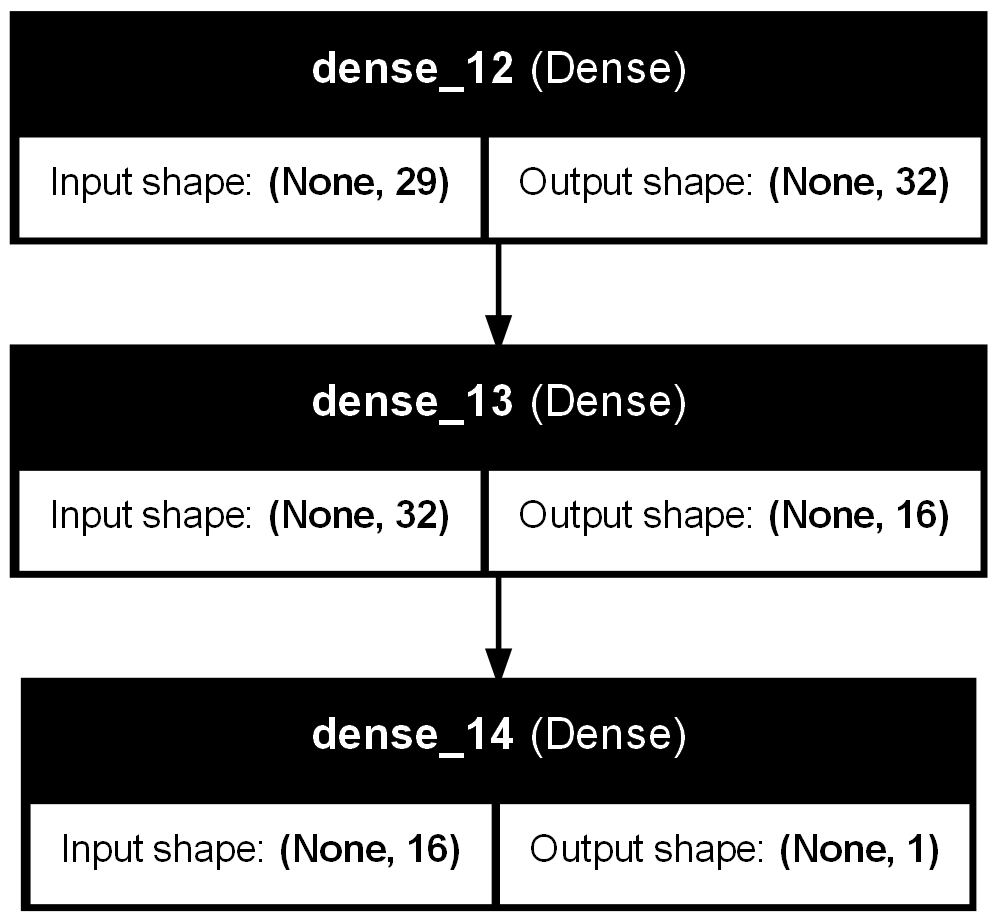

In [39]:
# Visualize the model
plot_model(ANN_model, to_file='Plots_Outputs/model_plot.png', show_shapes=True, show_layer_names=True)

<div style="border: 2px solid black; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<ul>
 
Trained a three-layer neural network with ReLU activation, sigmoid for binary classification. Used Adam optimizer, with early stopping. 5-Fold Cross-Validation. Produced an efficient binary classification model.
</ul>
  
</div>

<a class="anchor"  id="5.2"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        5.2- ANN Model Evaluation
</h2>

In [40]:
# Evaluate model on the test dataset
loss, accuracy = ANN_model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8605 - loss: 0.3548
Test accuracy: 0.868852436542511


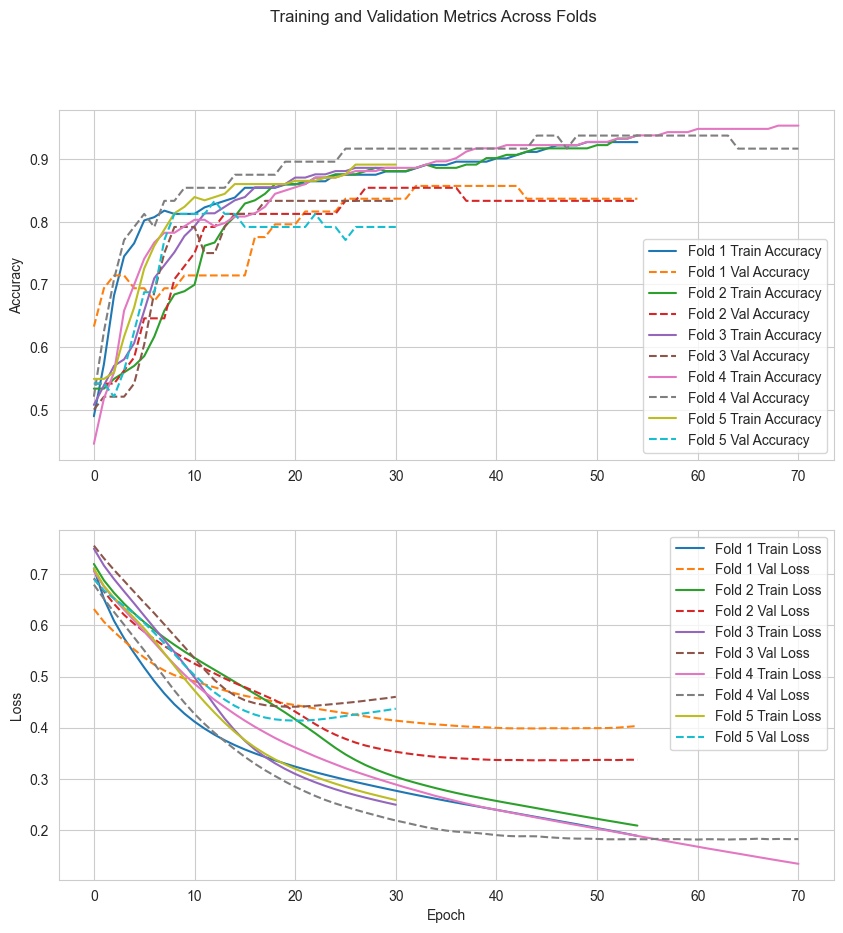

In [41]:
# Plots training and validation accuracy and loss for each fold on shared plots, making it easy to compare performance across folds.

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Training and Validation Metrics Across Folds')

for i, history in enumerate(all_histories):
    ax1.plot(history.history['accuracy'], label=f'Fold {i+1} Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label=f'Fold {i+1} Val Accuracy', linestyle='--')
    ax2.plot(history.history['loss'], label=f'Fold {i+1} Train Loss')
    ax2.plot(history.history['val_loss'], label=f'Fold {i+1} Val Loss', linestyle='--')

ax1.set_ylabel('Accuracy')
ax1.legend()
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend()

# save the figure
plt.savefig('Plots_Outputs/folds_plot.png', dpi=300, bbox_inches='tight')

plt.show()

<div style="border: 2px solid black; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<ul>
 
The model is performing as expected: loss decreases while accuracy increases with each epoch for both training and validation datasets, demonstrating effective learning.
</ul>
  
</div>

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Confusion Matrix:
 [[26  3]
 [ 5 27]]


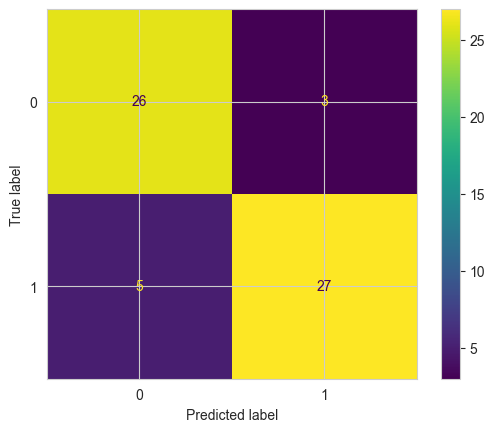

In [42]:
# Predictions on test data
y_pred = ANN_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(cm)
disp.plot()

# save the figure
plt.savefig('Plots_Outputs/cm_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [43]:
# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        29
         1.0       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [44]:
pred = ANN_model.predict(X_test).reshape(-1)  # Reshape predictions to 1D array
pred_binary = (pred >= 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

print("True heart attack chances      :", y_test.astype(int)[:20])
print("Predicted heart attack chances :", pred_binary[:20])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
True heart attack chances      : [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0]
Predicted heart attack chances : [0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0]


<a class="anchor"  id="4.6"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        Conclusion
</h2>

<div style="border: 2px solid black; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<ul>
 
The results demonstrate promising performance; however, considering the small dataset size, traditional machine learning models might be more suitable due to their ability to handle continuous features effectively.</ul>
  
</div>